In [65]:
# Author: Isabel Urrego Gómez 
# based on the example: Fuzzy Control Systems: Advanced Example and Fuzzy Control Systems: The Tipping Problem
# url:https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_control_system_advanced.html
# url: https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_tipping_problem_newapi.html
# Last modified: Agust 20,2020

# Music Recommendation System for Isabel Urrego Gómez
# Artificial Intelligence course
# Professor Olga Lucia Quintero

In [66]:
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

### Input

`length` $\in  [0, 8]$

`instrumentality` $\in  [0, 1]$

`monotony` $\in  [0, 1]$

`genre` $\in  [0, 10]$

In [67]:
# New Antecedent/Consequent objects hold universe variables and membership
# functions
length = ctrl.Antecedent(np.arange(0, 10, 0.1), 'length')
instrumentality = ctrl.Antecedent(np.arange(0, 1, 0.01), 'instrumentality')
monotony = ctrl.Antecedent(np.arange(0, 1, 0.01), 'monotony')
genre = ctrl.Antecedent(np.arange(0, 10, 0.1), 'genre')
grade = ctrl.Consequent(np.arange(0, 10, 0.1), 'grade',defuzzify_method='lom')

### Membership Functions

In [68]:
# length
length['short'] = fuzz.sigmf(length.universe, 1.5,-3)
length['normal'] = fuzz.gaussmf(length.universe,3.5,0.4)
length['long'] = fuzz.sigmf(length.universe, 6,3)

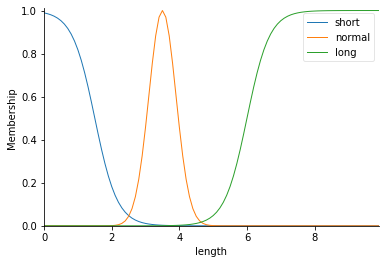

In [69]:
length.view()

In [70]:
# instrumentality
instrumentality['low'] = fuzz.sigmf(instrumentality.universe,0.3,-30)
instrumentality['medium'] = fuzz.gaussmf(instrumentality.universe,0.5,0.1)
instrumentality['high'] = fuzz.sigmf(instrumentality.universe,0.7,30)

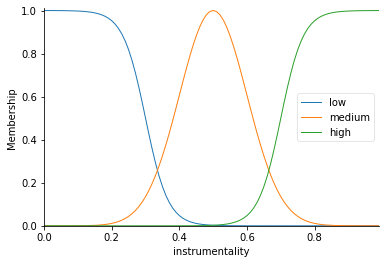

In [71]:
instrumentality.view()

In [72]:
# Monotony
monotony['not at all'] = fuzz.sigmf(monotony.universe,0.3,-30)
monotony['a bit'] = fuzz.gaussmf(monotony.universe,0.6,0.1)
monotony['very'] = fuzz.sigmf(monotony.universe,0.8,30)

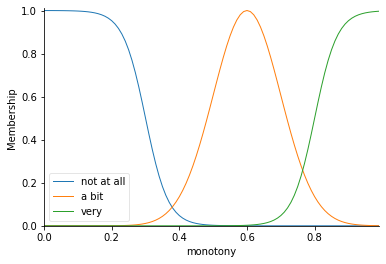

In [73]:
monotony.view()

In [74]:
# Genre
genre['vallenato'] = fuzz.sigmf(genre.universe, 1.5,-4)
genre['others'] = fuzz.trapmf(genre.universe,[2.1,2.8,5,8])
genre['rock'] = fuzz.sigmf(genre.universe,8,1.5)

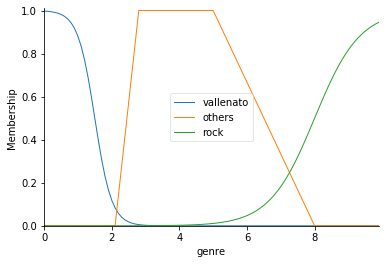

In [75]:
genre.view()

In [76]:
#grade
grade['really bad'] = fuzz.gaussmf(grade.universe,0,1)
grade['bad'] = fuzz.gaussmf(grade.universe, 2.5, 0.6)
grade['normal'] = fuzz.gaussmf(grade.universe, 5, 0.8)
grade['good'] = fuzz.gaussmf(grade.universe, 7, 0.6)
grade['amazing'] = fuzz.gaussmf(grade.universe, 10, 0.7)

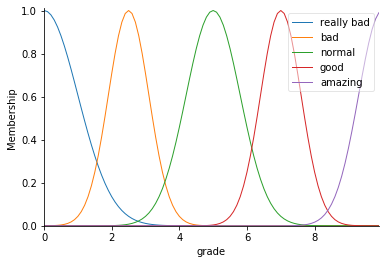

In [77]:
grade.view()

### Decision Rules

In [78]:
rule1 = ctrl.Rule(instrumentality['high'] & monotony['not at all'] & ~genre['vallenato'], grade['amazing'], and_func=np.min, or_func=np.max)
rule2 = ctrl.Rule(instrumentality['medium'] & ~genre['vallenato'] & (~length['long'] | ~monotony['very']), grade['good'], and_func=np.min, or_func=np.max)
rule3 = ctrl.Rule(genre['vallenato'], grade['really bad'], and_func=np.min, or_func=np.max)
rule4 = ctrl.Rule(monotony['very'] & length['long'], grade['really bad'], and_func=np.min, or_func=np.max)
rule5 = ctrl.Rule(~genre['vallenato'] & ~genre['rock'] & ~instrumentality['high'], grade['normal'], and_func=np.min, or_func=np.max)

rule6 = ctrl.Rule(instrumentality['high'] & genre['rock'] & (~monotony['very'] | ~length['long']), grade['amazing'], and_func=np.min, or_func=np.max)
rule7 = ctrl.Rule(instrumentality['low'] & length['long'], grade['bad'], and_func=np.min, or_func=np.max)
rule8 = ctrl.Rule(length['normal'] & instrumentality['medium'] & monotony['a bit'] & genre['others'], grade['normal'], and_func=np.min, or_func=np.max)
rule9 = ctrl.Rule(instrumentality['low'] & monotony['very'], grade['bad'], and_func=np.min, or_func=np.max)
rule10 = ctrl.Rule(length['short'] & genre['others'], grade['normal'], and_func=np.min, or_func=np.max)

rule11 = ctrl.Rule(instrumentality['high'] & monotony['very'] & genre['others'], grade['normal'], and_func=np.min, or_func=np.max)
rule12 = ctrl.Rule(monotony['not at all'] & length['short'], grade['bad'], and_func=np.min, or_func=np.max)
rule13 = ctrl.Rule(genre['rock'] &  monotony['very'] & length['normal'], grade['good'], and_func=np.min, or_func=np.max)
rule14 = ctrl.Rule(instrumentality['high'] & monotony['very'] & genre['rock'] & length['long'], grade['normal'], and_func=np.min, or_func=np.max)
rule15 = ctrl.Rule(instrumentality['high'] & monotony['a bit'] & ~genre['vallenato'], grade['normal'], and_func=np.min, or_func=np.max)

rule16 = ctrl.Rule(instrumentality['low'] & monotony['not at all'] & genre['others'], grade['normal'], and_func=np.min, or_func=np.max)
rule17 = ctrl.Rule(instrumentality['high'] & monotony['not at all'] & genre['rock'] & length['long'], grade['amazing'], and_func=np.min, or_func=np.max)

In [79]:
#Control system 
grade_ctrl = ctrl.ControlSystem([rule1,  rule2,  rule3,  rule4,  rule5,
                                 rule6,  rule7,  rule8,  rule9,  rule10,
                                 rule11, rule12, rule13, rule14, rule15,
                                 rule16, rule17])

In [80]:
#Simulation
grade_value = ctrl.ControlSystemSimulation(grade_ctrl)

In [81]:
#Variable Values: the length must be given in minutes
grade_value.input['instrumentality'] = 0.8
grade_value.input['length'] = 7
grade_value.input['monotony'] = 0.6
grade_value.input['genre'] = 7

In [82]:
#Compute the grade
grade_value.compute()

5.2448660778217135


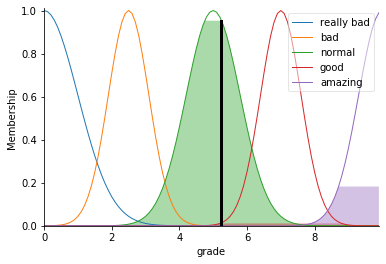

In [83]:
print(grade_value.output['grade'])
grade.view(sim=grade_value)